In [11]:
##Step1: Import libraries 
#Perform large computation
import numpy as np
#Data Manipulation
import pandas as pd
#Data Visualization
import matplotlib.pyplot as plt
#Stastical Visualization
import seaborn as sns

In [15]:
#Load the insurance dataset
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**The dataset has been loaded successfully . The variable `data` now contains the entire dataset.**

In [7]:
##Step 2: Check the shape of the data along with the data types of the column
#Shape of the Data
data.shape
print(f'Dataset Shape: {data.shape}')
print(f'Dataset Rows: {data.shape[0]}')
print(f'Dataset Columns: {data.shape[1]}')

Dataset Shape: (1338, 7)
Dataset Rows: 1338
Dataset Columns: 7


In [8]:
#Data types of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#Display the first five rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Display the last five rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**The dataset has 1338 rows and 7 columns.**

**The dataset contains both numerical columns (`age`, `bmi`, `children`, `charges`) as well as categorical columns (`sex`, `smoker`, `region`).**

In [13]:
##Step 3: Check missing values in the dataset and find the appropriate measures to fill in the missing values
#Finding missing values
print('Missing values in each column:')
data.isnull().sum()

Missing values in each column:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**No missing values are present in the dataset.**

In [15]:
#Five point Summary
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**The five-point summary shows a wide range in `charges`, indicating large variability in insurance costs.**

In [16]:
##Step 4: Explore the relationship between the feature and target column using a scatter plot of numerical columns

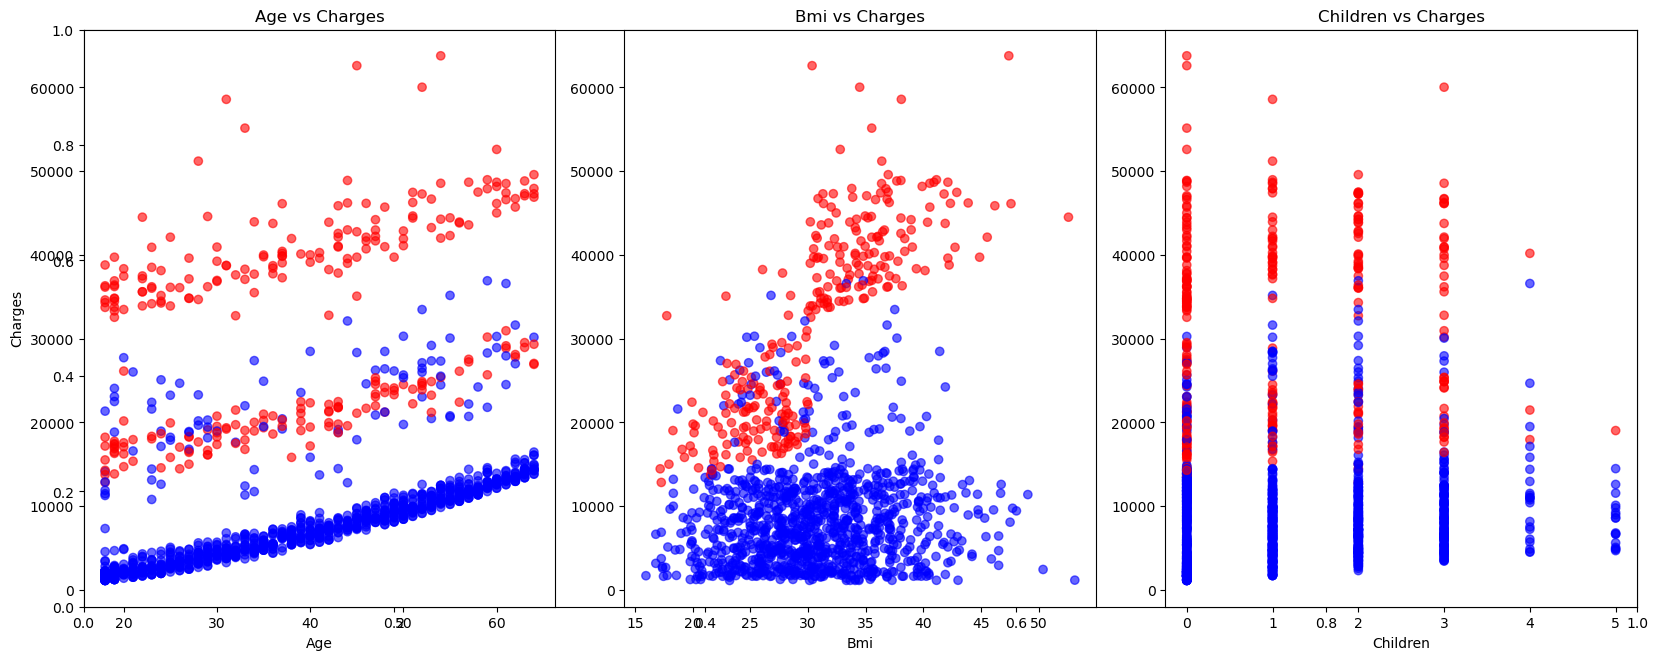

In [17]:
color_map=data['smoker'].map({'yes':'red','no':'blue'})
categorical_features=['age','bmi','children']
plt.subplots(figsize=(17,7))
for i, column in enumerate(categorical_features):
    plt.subplot(1,3,i+1)
    plt.scatter(data[column],data['charges'],c=color_map,alpha=0.6)
    plt.title(f'{column.capitalize()} vs Charges')
    plt.xlabel(column.capitalize())
    plt.ylabel('Charges' if i==0 else'')
plt.tight_layout()
plt.show()

**`age` vs `charges`: Insurance charges increase with age, with smokers incurring higher costs.**

**`bmi` vs `charges`: Higher BMI is correlated with higher charges, particularly for smokers.**

**`children` vs `charges`: Insurance charges show little to no significant increase as the number of children increases.**

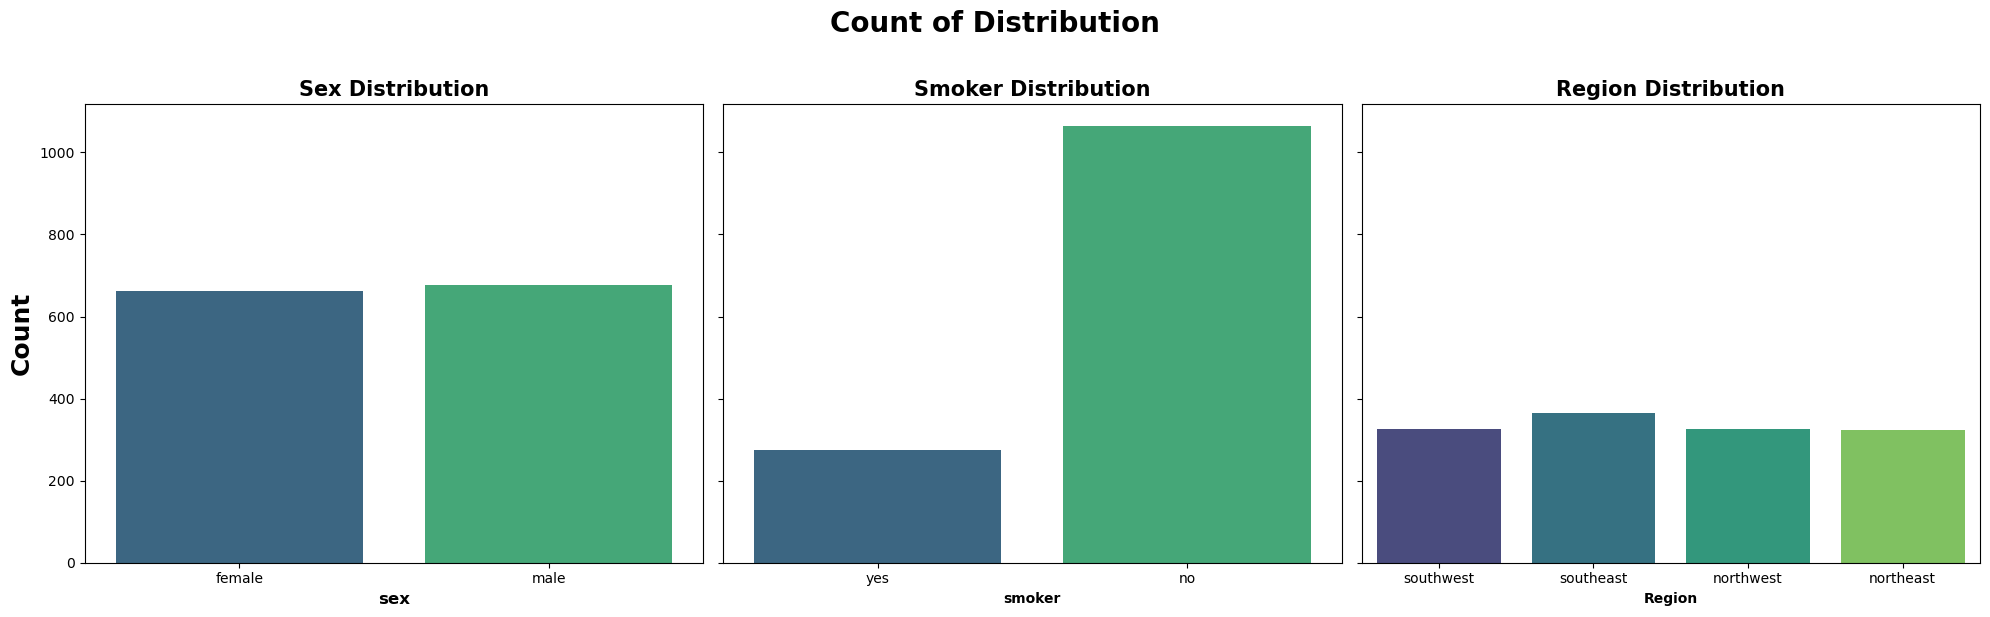

In [19]:
#Explore the relationship between the feature and target column using a count plot of categorical columns
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.countplot(data=data,x='sex', hue='sex',ax=axs[0],palette='viridis')
axs[0].set_xlabel('sex', fontsize=12,fontweight='bold')
axs[0].set_title('Sex Distribution',fontsize=15, fontweight='bold')
axs[0].set_ylabel('Count', fontsize=18,fontweight='bold')

sns.countplot(data=data,x='smoker', hue='smoker',ax=axs[1],palette='viridis')
axs[1].set_xlabel('smoker',fontweight='bold')
axs[1].set_title('Smoker Distribution',fontsize=15, fontweight='bold')

sns.countplot(data=data,x='region', hue='region',ax=axs[2],palette='viridis')
axs[2].set_xlabel('Region',fontweight='bold')
axs[2].set_title('Region Distribution',fontsize=15, fontweight='bold')

fig.suptitle('Count of Distribution', fontsize=20, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

**`sex`: The dataset has a balanced distribution of males and females.**

**`smoker`: There are significantly more non-smokers than smokers in the dataset.**

**`region`: All four regions (northeast, northwest, southeast, southwest) have somewhat a similar distribution.**

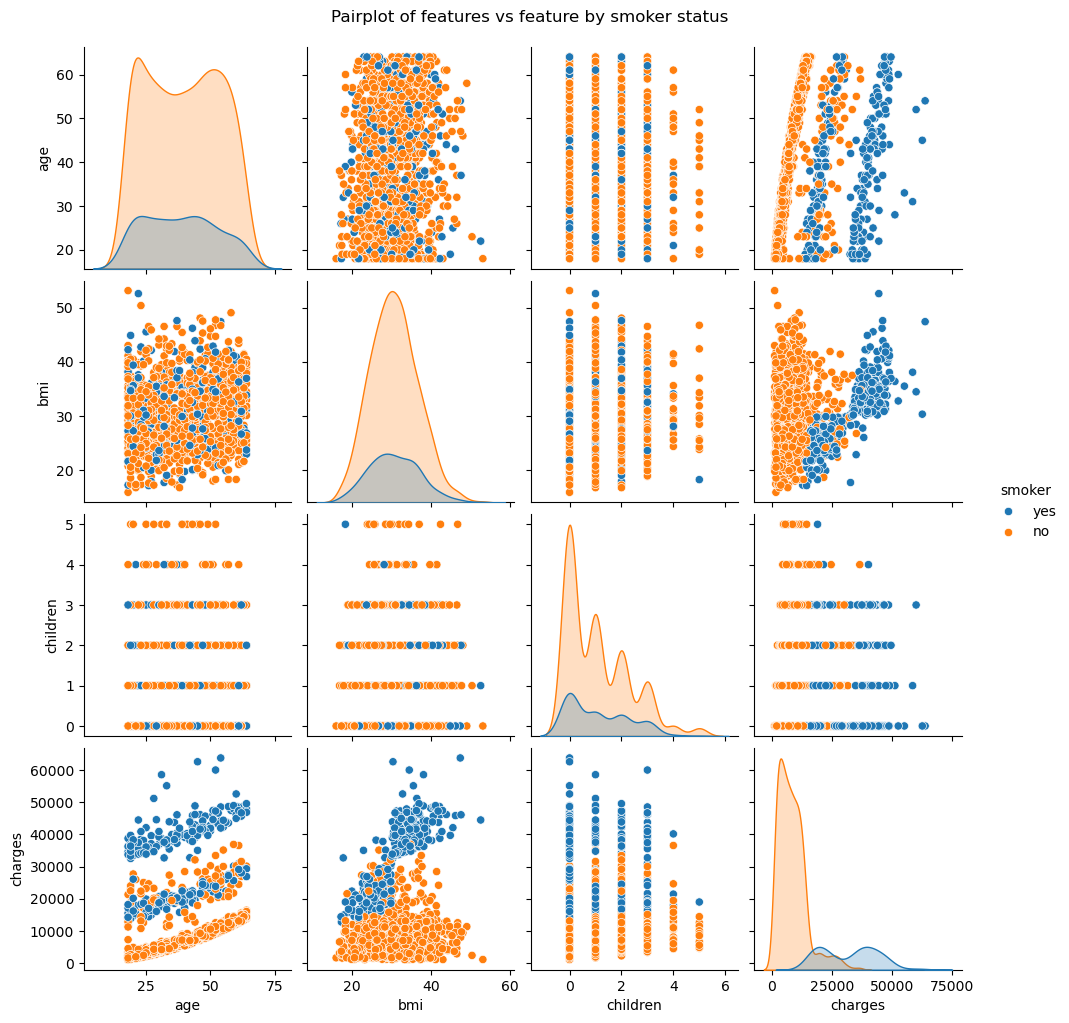

In [62]:
##Step 5: Perform data visualization using plots of feature vs feature
#pairplot
sns.pairplot(data,hue='smoker',diag_kind='kde')
plt.suptitle('Pairplot of features vs feature by smoker status',y=1.02)
plt.show()

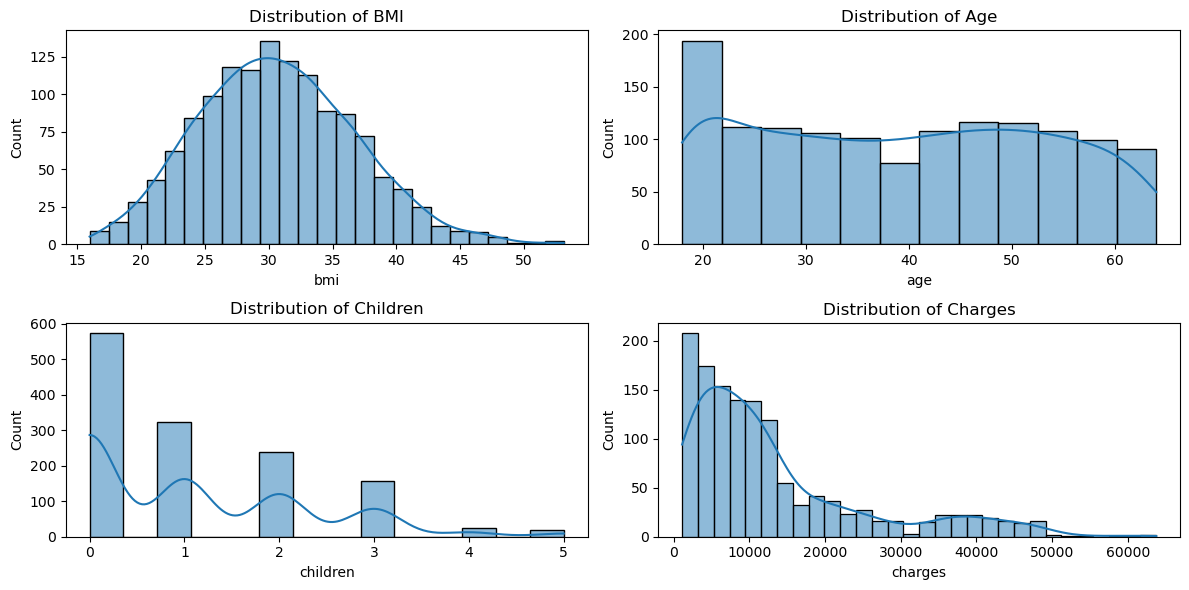

In [60]:
#histogram plot
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,6))
sns.histplot(data['bmi'],kde=True,ax=axes[0,0])
axes[0,0].set_title('Distribution of BMI')

sns.histplot(data['age'],kde=True,ax=axes[0,1])
axes[0,1].set_title('Distribution of Age')

sns.histplot(data['children'],kde=True,ax=axes[1,0])
axes[1,0].set_title('Distribution of Children')

sns.histplot(data['charges'],kde=True,ax=axes[1,1])
axes[1,1].set_title('Distribution of Charges')

plt.tight_layout()
plt.show()

**`bmi` and `age` show near-normal distributions.**
    
**`children` is discrete, with most policyholders having 0–2 children.**

**`charges` are heavily right-skewed.**


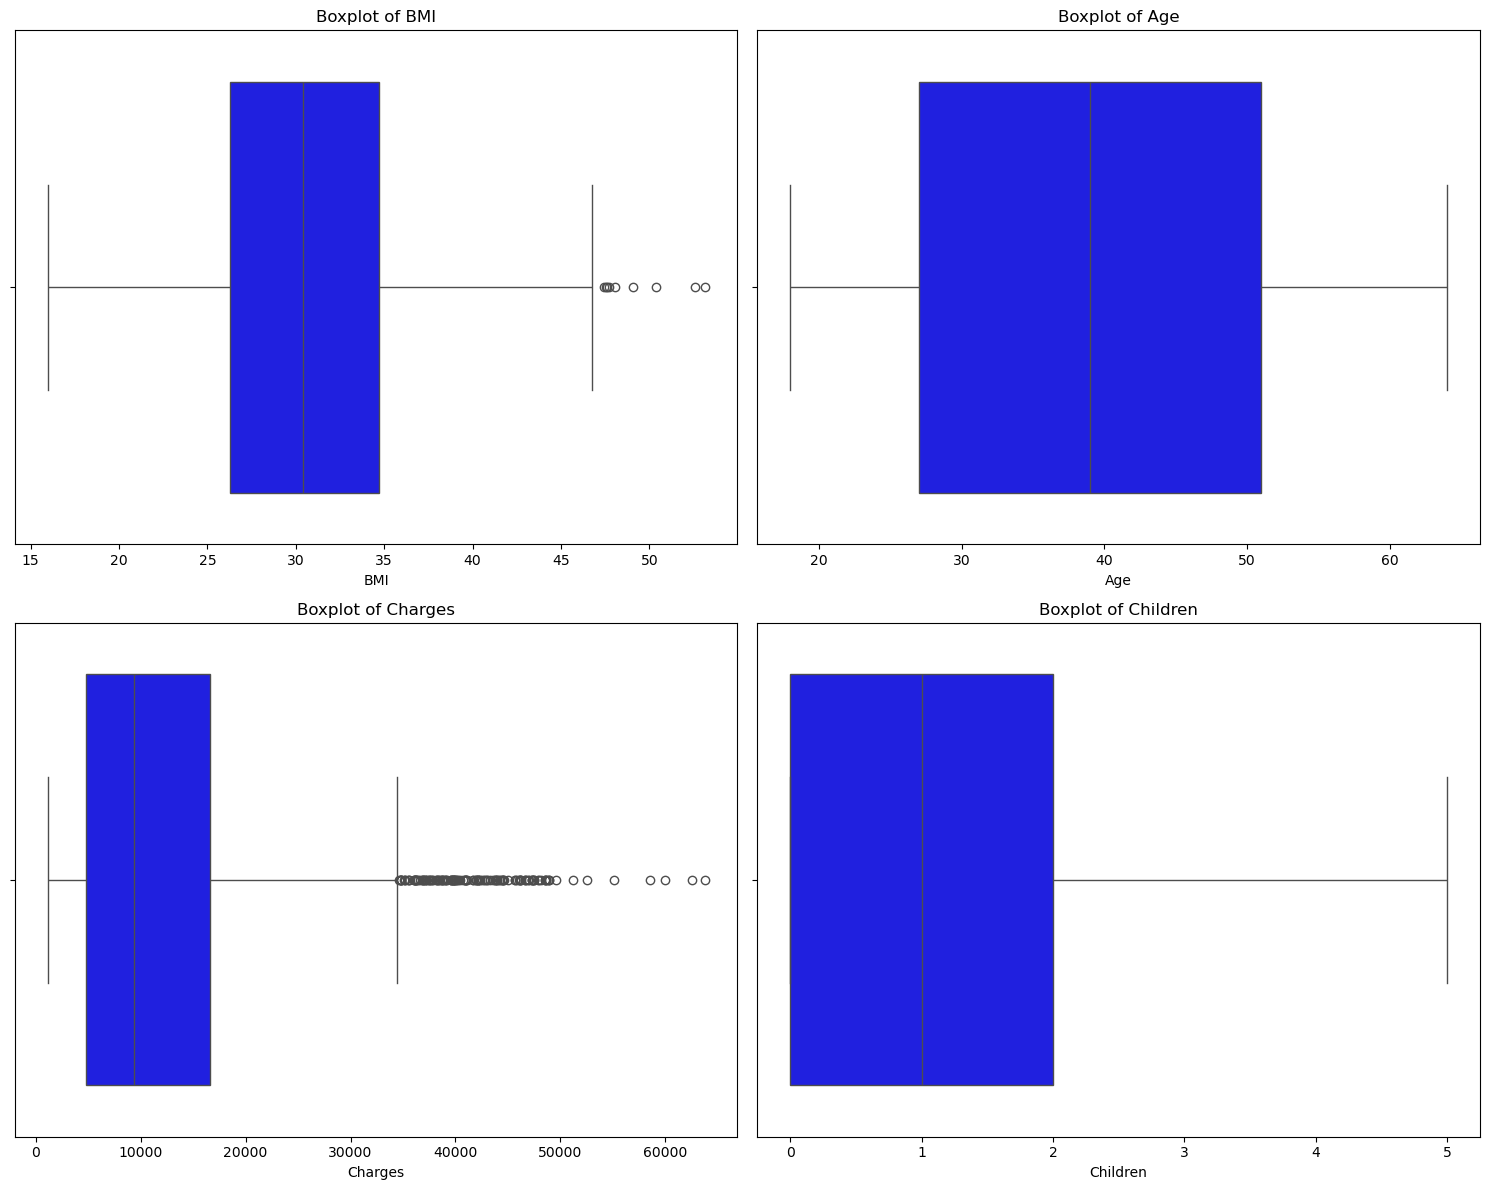

In [37]:
#BoxPlot
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x=data['bmi'],color='blue')
plt.title('Boxplot of BMI')
plt.xlabel('BMI')

plt.subplot(2,2,2)
sns.boxplot(x=data['age'],color='blue')
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(2,2,3)
sns.boxplot(x=data['charges'],color='blue')
plt.title('Boxplot of Charges')
plt.xlabel('Charges')

plt.subplot(2,2,4)
sns.boxplot(x=data['children'],color='blue')
plt.title('Boxplot of Children')
plt.xlabel('Children')

plt.tight_layout()
plt.show()

**Outliers are present in `charges` and `bmi`.**

**Premiums greater than 50,000 can be considered outliers based on the boxplot.**

**BMI values above 40 can be considered outliers depending on the data.**

**Age does not show significant outliers, while `children` is discrete.**

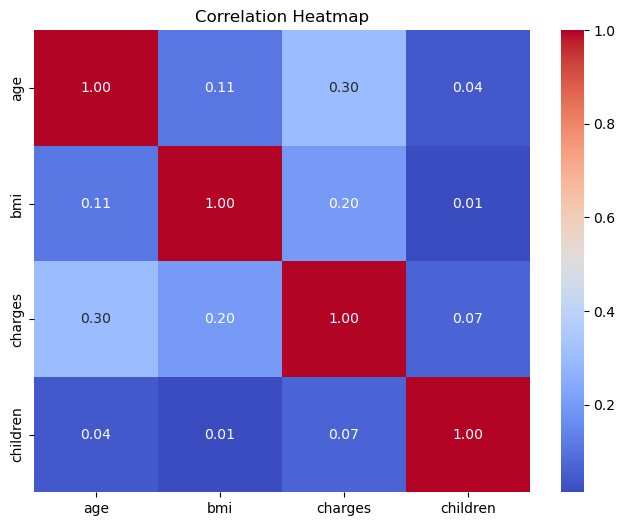

In [49]:
#Heatmap
numerical_features=['age','bmi','charges','children']
correlation_matrix= data[numerical_features].corr()

#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**`charges` are positively correlated with `age` and `bmi`.**

**The correlation is moderate, suggesting other factors also influence charges.**

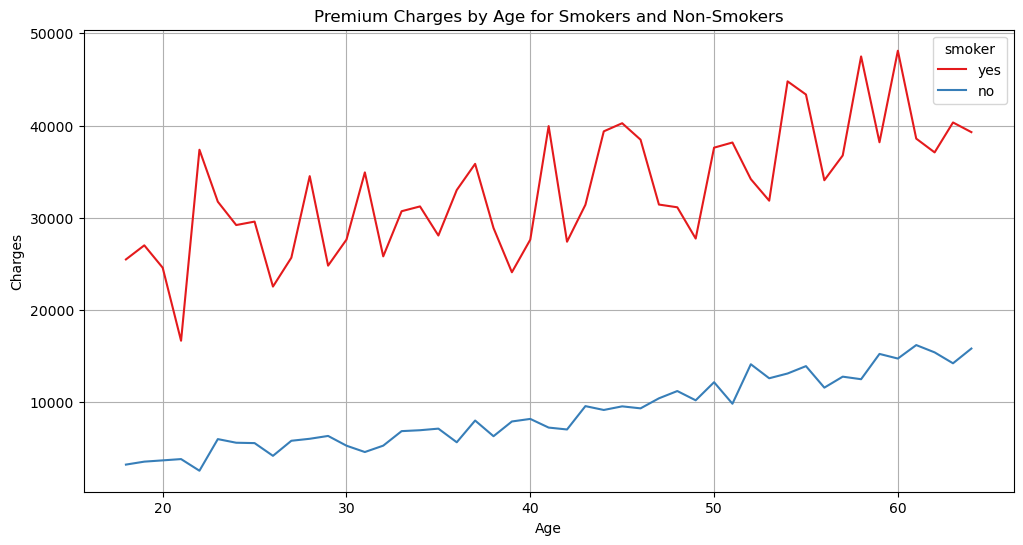

In [54]:
##Step 6: Check if the number of premium charges for smokers or non-smokers is increasing as they are aging
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='age', y='charges', hue='smoker', errorbar=None,markers=True, palette='Set1')
plt.title('Premium Charges by Age for Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

**Smokers incur consistently higher insurance charges than non-smokers.**

**Charges increase with age for both groups, but the rise is steeper for smokers.**